In [5]:
# For Google Colab

""" from google.colab import drive
drive.mount('/content/drive', force_remount = True)

import sys
sys.path.insert(0, '/content/drive/MyDrive/Colab Notebooks')

!pip install fastf1

"""

" from google.colab import drive\ndrive.mount('/content/drive', force_remount = True)\n\nimport sys\nsys.path.insert(0, '/content/drive/MyDrive/Colab Notebooks')\n\n!pip install fastf1\n\n"

In [2]:
import fastf1
import fastf1.plotting
fastf1.plotting.setup_mpl(color_scheme='fastf1', mpl_timedelta_support=False, misc_mpl_mods=False)

import sys
import os
sys.path.append(os.path.abspath('..'))
from utils import fastf1_qualifying_util

In [3]:
qualifying = fastf1.get_session(2025, 9, 'Q')
qualifying.load()

req         WARNING 	DEFAULT CACHE ENABLED! (252.43 MB) /home/devadmin/.cache/fastf1
core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fet

In [4]:
laps = qualifying.laps.pick_quicklaps()
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()
# Get compound colors
compound_colors = fastf1.plotting.COMPOUND_COLORS
print('Compound colors', compound_colors)

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

team_palette = {team: fastf1.plotting.get_team_color(team, qualifying) for team in team_order}

drivers = qualifying.drivers
driver_laps = qualifying.laps.pick_drivers(drivers).pick_quicklaps()
driver_laps = driver_laps.reset_index()

finishing_order = [qualifying.get_driver(i)["Abbreviation"] for i in drivers]
print('Finishing order: ', finishing_order)
driver_colors = {}
for driver_abbr in driver_laps['Driver'].unique():
    color = fastf1.plotting.get_driver_color(driver_abbr, qualifying)
    driver_colors[driver_abbr] = color

/home/fastf1_util_functions/fastf1/lib/python3.12/site-packages/fastf1/plotting/__init__.py:84: FutureWarning: INCOMPATIBLE with 2025 season! COMPOUND_COLORS is deprecated and will be removed in a future version.
  warnings.warn(f"INCOMPATIBLE with 2025 season! {name} is deprecated "
req            INFO 	Using cached data for driver_info


Compound colors {'SOFT': '#da291c', 'MEDIUM': '#ffd12e', 'HARD': '#f0f0ec', 'INTERMEDIATE': '#43b02a', 'WET': '#0067ad', 'UNKNOWN': '#00ffff', 'TEST-UNKNOWN': '#434649'}
Index(['McLaren', 'Ferrari', 'Red Bull Racing', 'Mercedes', 'Alpine',
       'Racing Bulls', 'Aston Martin', 'Kick Sauber', 'Williams',
       'Haas F1 Team'],
      dtype='object', name='Team')
Finishing order:  ['PIA', 'NOR', 'VER', 'RUS', 'HAM', 'ANT', 'LEC', 'GAS', 'HAD', 'ALO', 'ALB', 'BOR', 'LAW', 'STR', 'BEA', 'HUL', 'OCO', 'SAI', 'COL', 'TSU']


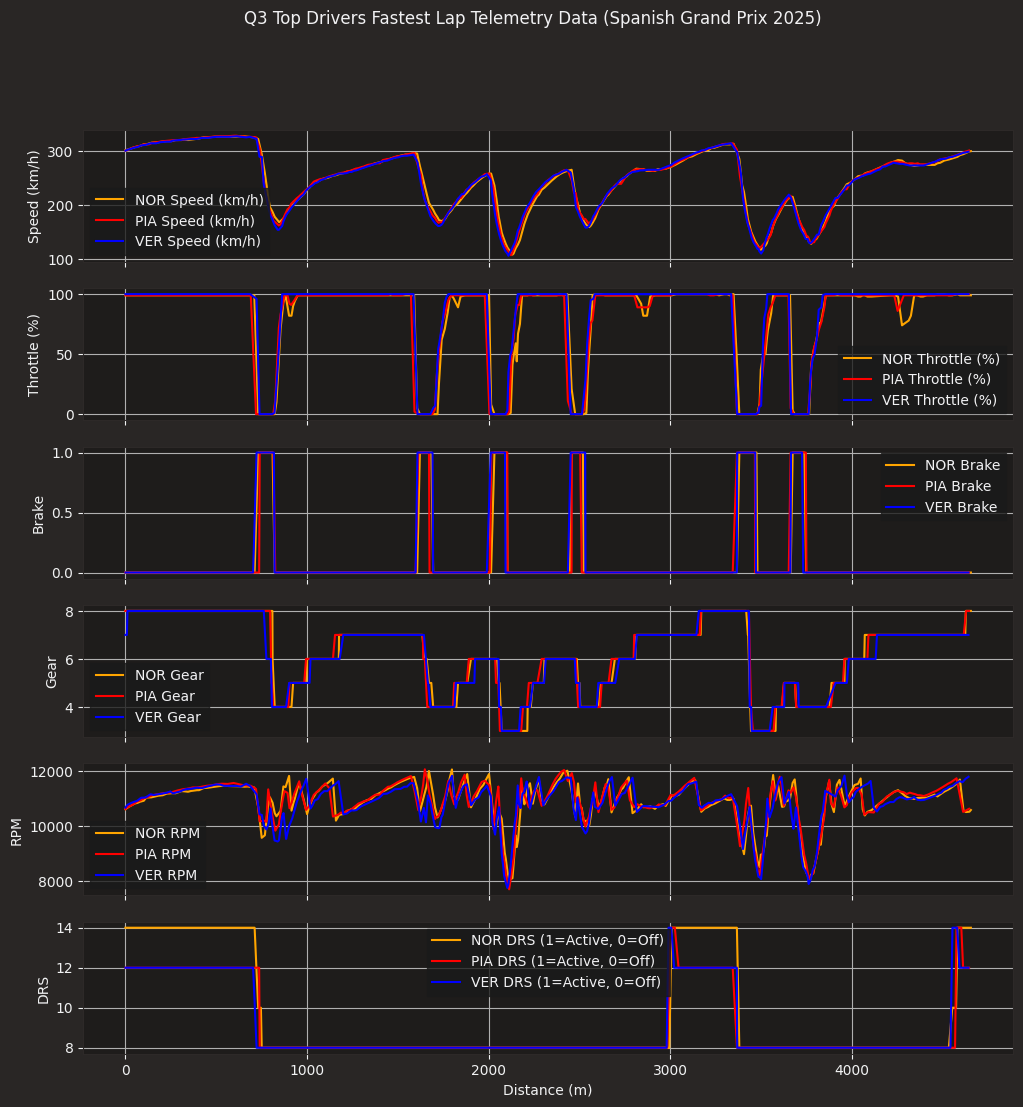

In [5]:
fastf1_qualifying_util.plot_telemetry(qualifying, ['NOR', 'PIA', 'VER'])
